# mechtest_ufmg: Mechanical Testing Analysis 

This library is being developed to assist the students of the course of Mechanical and microstructural characterization of metals. Its content is prepared to guide throughout the lectures and to help the students in the studying process. 

The course is offered as an elective discipline for the Metallurgical and Materials Engineering students, and is taught at the School of Engineering of the Federal University of Minas Gerais. 

## A brief description

The functions provided by this package are intended to calculate the mechanical properties of most of the engineering materials that can be tested in tension. The functions that are already implemented can calculte properties and plot graphs of the data. 

#### Mechanical properties that can be calculated 

* Apparent modulus of elasticity ($E$)
* Yield strength ($\sigma_y$)
* Ultimate tensile strength (UTS or $\sigma_R$)
* Uniform elongation ($\varepsilon_u$)
* Resilience ($U_r$): approximation and numerically integrated
* Toughness ($U_t$): approximation and numerically integrated
* Hollomon's equation parameters: resistance coefficient ($K$) and strain hardening exponent ($n$)

#### Plots obtained as outputs from some functions

* Engineering stress/strain curve
* Plot highlighting the linear portion used to calculate $E$
* Plot highlighting the determination of $\sigma_y$
* Flow stress curve
* True stress flow curve
* Hollomon's equation fitting to the data

##### Main dependencies

The main dependencies to use *__mechtest_ufmg__* are the following.

* os
* matplotlib
* numpy
* scipy in scipy.optimize
* pandas (for data importing)

The first one is a standard library, the others can be installed via `pip install package_name`. If you are using Anaconda and/or Google Colab it all may work right out of the box.


In [1]:
### Example of installing modules

# !pip install scipy
# !pip install pandas
# !pip install matplotlib

In [2]:
##### Importing the necessary packages

from mechtest_ufmg.Properties import *  # Importing all functions at once
import pandas as pd                     # Importing pandas to read the data

## Importing the data to a dataframe with *pandas*

In [3]:
data = pd.read_csv('data/astm1055.tsv', sep = '\t', decimal = ',')

In [4]:
##### Just checking....
data.head()

,Strain,Stress
0,0.0,0.27843
1,0.0,0.39128
2,0.0,0.51952
3,0.0,0.63649
4,0.0,0.74949


##### Extracting the dataframe columns into series with our data

In [5]:
strain = data['Strain']
stress = data['Stress']

### Using `plot_eng_SSC()` to plot the engineering stress/strain curve

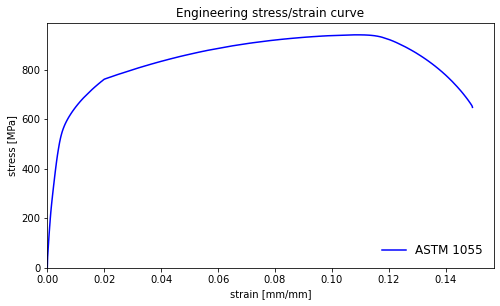

In [6]:
%matplotlib inline
plot_eng_SSC(strain, stress, fig_label = 'ASTM 1055', 
             show_plot = True, save = True, name = 'eng_SSC_1055')


### Using `young_modulus()` to determine the elasticity modulus

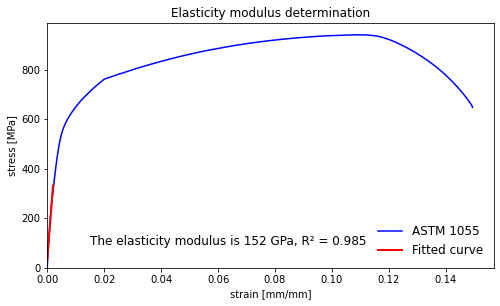

In [7]:
E, b, R2 = young_modulus(strain, stress, fig_label = 'ASTM 1055', 
                      show_plot = True, save = True, name = 'elasticity_1055')


### Using `sigma_y()` to calculate the yield strength $\sigma_y$

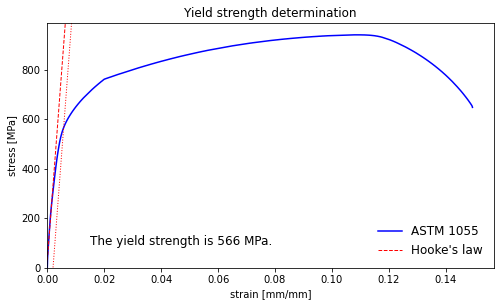

The yield strength is 566 MPa.


In [8]:
sig_y = sigma_y(strain, stress, E, b, fig_label = 'ASTM 1055', 
                show_plot = True, save = True, name = 'yield_strength_1055')


### Using `UTS()` to calculate the ultimate tensile strength $UTS$ or $\sigma_R$


In [9]:
uts = UTS(strain, stress, show = True)

The ultimate tensile strength is 940 MPa. 


### Calculating the resilience $U_r$ using an approximate mathematical formula and numerical integration

Using `aprox_resilience()` $U_r$ is calculated with the formula: 
                    $$ U_r = \frac{\sigma_y^2}{2E}$$
                    

In [10]:
aprox_res = aprox_resilience(E, sig_y, show = True)

The resilience calculated by the formula yield²/2E is 1.06 MJ/m³. 


Using `resilience()` $U_r$ is calculated as:
                    $$ U_r = \int_{0}^{\varepsilon_y} \sigma \,d \varepsilon $$

In [11]:
res = resilience(strain, stress, sig_y)

The resilience calculated by trapezoidal integration with dx = 1.0 is 1.15 MJ/m³. 


### Calculating the toughness $U_t$ using an approximate mathematical formula and numerical integration

Using `aprox_toughness()` $U_r$ is calculated with the formula: 
                    $$ U_r = \frac{\sigma_y + \sigma_R}{2} \times \varepsilon_f$$
                    

In [12]:
aprox_tough = aprox_toughness(strain, sig_y, uts, show = True)

The material toughness is approximately 112 MJ/m³.


Using `toughness()` $U_r$ is calculated as:
                    $$ U_r = \int_{0}^{\varepsilon_f} \sigma \,d \varepsilon $$

In [13]:
tough = toughness(strain, stress, show = True)

The material toughness computed by Trapezoidal method is 124 MJ/m³. 


### Plotting the flow stress curve 

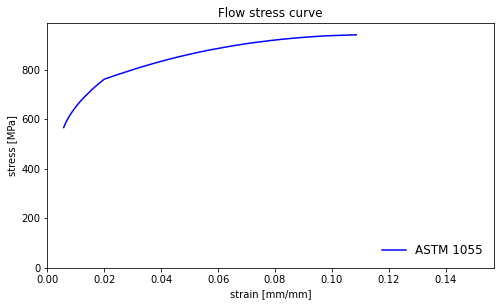

In [14]:
plot_flow_curve(strain, stress, sig_y, uts, fig_label = 'ASTM 1055', 
                show_plot = False, save = True, name = 'flow_curve_1055')


### Plotting the true stress/strain curve

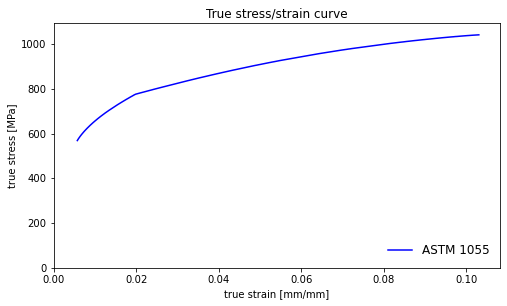

In [15]:
plot_true_SSC(strain, stress, sig_y, uts, fig_label = 'ASTM 1055', 
              show_plot = False, save = True, name = 'true_curve_1055')


### Plotting the flow model curve with Hollomon's equatiion

The resistance modulus is 1685 MPa and the strain-hardening exponent is 0.2.


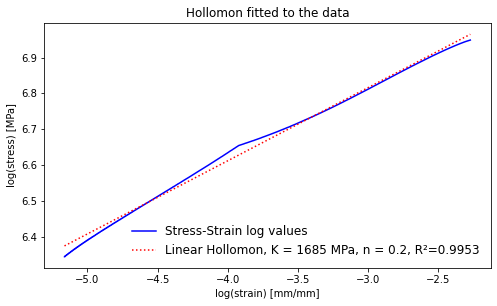

In [16]:
n, K = flow_model(strain, stress, sig_y, uts, show_plot = False, save = True, name = 'Hollomon_1055')